# Catal-hedron : Atom pattern analyzer

This is a tool to detecto atom pattern with a few user interaction. 

Basically the procedure has four easy steps.
1. asdf
2. asdf



In [2]:
# prerequisite 
import IPython
import os
import sys
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from path_patch import PolygonInteractor
from reference import ReferenceSelector
from dotter import ParticleModifier

image = scipy.misc.imread(os.path.join('images', '0th.jpg'))
height = image.shape[0]
width = image.shape[1]

reference = None
particles = None
mask_xs_ = [0.2*width, 0.8*width, 0.8*width, 0.2*width]
mask_ys_ = [0.2*height, 0.2*height, 0.8*height, 0.8*height]

## Step 1: Select 5 reference points

We need one center atom and its four neighboring atom.

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.imshow(image)
selector = ReferenceSelector(ax, reference)

In [ ]:
reference = selector.vertices

## Step 2: Select region of interest

Here, we want to know a region that you want to detect atoms in. We first give you a default rectangle with draggable corners. If you want a more deformable shape, you can insert vertices with the key 'i' and drag them. You can also delete vertices with the key 'd'.

In [ ]:
%matplotlib notebook
from matplotlib.patches import Polygon
poly = Polygon(list(zip(mask_xs_, mask_ys_)), animated=True, alpha=0.6)
fig, ax = plt.subplots()
ax.imshow(image)
ax.set_title('Click and drag a point to move it')
ax.add_patch(poly)
selector = PolygonInteractor(ax, poly)

In [ ]:
mask_xs_ = list(selector.poly.xy[:, 0])
mask_ys_ = list(selector.poly.xy[:, 1])
mask = [(x, y) for x, y in zip(mask_xs_, mask_ys_)]

# Save user selection

In [ ]:
import pickle
data = {"reference": reference, "mask": mask}
with open('0th.pickle', 'wb') as pf:
    pickle.dump(data, pf)

In [ ]:
import pickle
with open('0th.pickle', 'rb') as pf:
    data = pickle.load(pf)
    reference = data["reference"]
    mask = data["mask"]

## Step 3: Detection

From the information above, we will detect atoms.

In [ ]:
%matplotlib inline
maxima, pos, G, curves13, curves24, locs = get_me_atoms(image, reference, mask)

## visualize
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.plot(maxima[:, 0], maxima[:, 1], 'rx')
plt.title('first local maxima')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.plot(pos[:, 0], pos[:, 1], 'rx')
plt.title('local maxima in the mask')

plt.figure(figsize=(10, 10))
plt.imshow(image)
nx.draw_networkx(G, pos, node_size=4, font_size=6)
plt.title('graph network')

plt.figure(figsize=(10, 10))
plt.imshow(image)
draw_curves(curves13)
draw_curves(curves24)
plt.plot(locs[:,0], locs[:,1], 'go')
plt.title('fitted curves and intersections')

In [ ]:
import pickle
data['locations'] = locs
with open('0th.pickle', 'wb') as pf:
    pickle.dump(data, pf)

In [3]:
import pickle
with open('0th.pickle', 'rb') as pf:
    data = pickle.load(pf)
    reference = data["reference"]
    mask = data["mask"]
    locs = data["locations"]

## Step 4: Suggestion

We will show detection results below. Again, you can modify them by dragging points, inserting points with the key 'i', or deleting points with the key 'd'. If the result is too much wrong, you can go to step 1, and re-do.

<IPython.core.display.Javascript object>


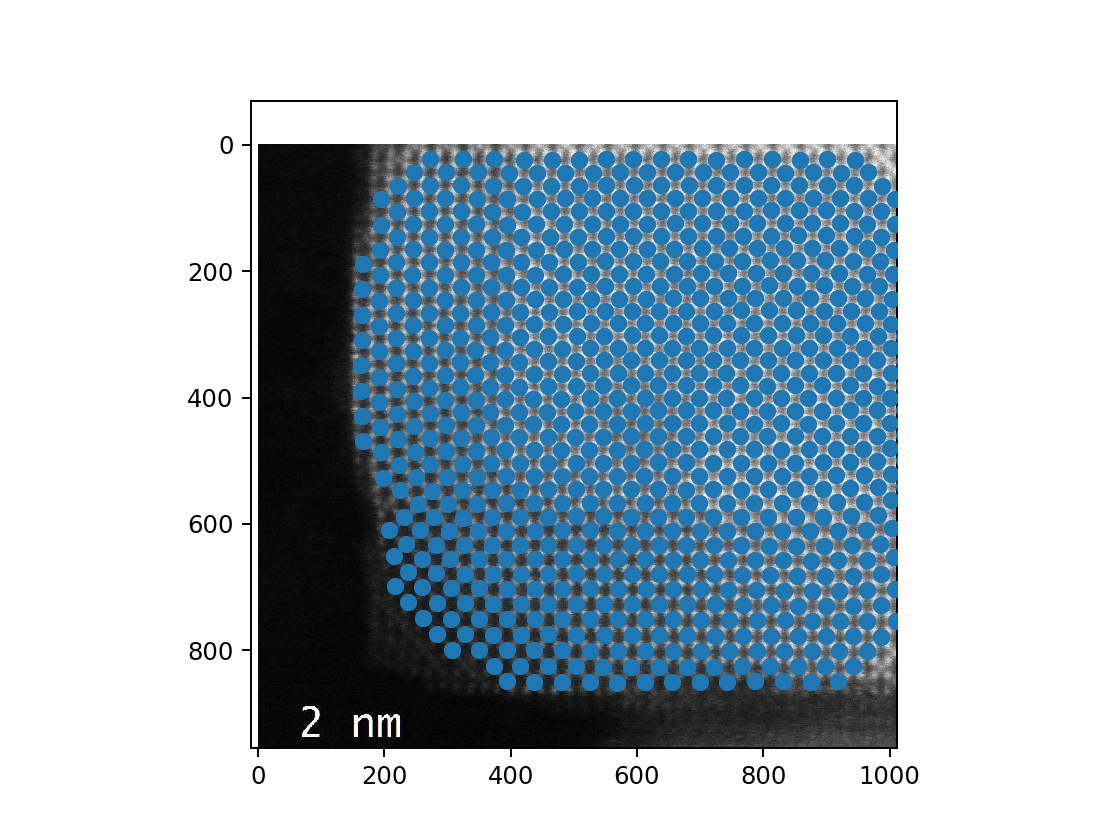

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
ax.imshow(image)
selector = ParticleModifier(ax, locs)


In [ ]:
new_pos = selector.vertices
if pos != new_pos:
    pos = new_pos
    G, ind13, ind24 = build_graph(pos, neighbors)